In [1]:
#Librerías básicas utiliadas
import numpy as np
import pandas as pd
import re
import os

#Librerías necesarias para abrir imágenes, generar nube de palabras y plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librerías necesarias para la limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [2]:
#cargando df
df = pd.read_parquet("reviews_reviews_Automotive_5.gz.parquet", engine='pyarrow')
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but ...",4.0,Okay long cables,1315094400,"09 4, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012"


In [ ]:
#cargando df
df = pd.read_parquet("reviews_reviews_Automotive_5.gz.parquet", engine='pyarrow')
df.head()


In [3]:
df = df['reviewText']
df = pd.DataFrame(df, columns=['reviewText'])
df

,reviewText
0,I needed a set of jumper cables for my new car...
1,"These long cables work fine for my truck, but ..."
2,Can't comment much on these since they have no...
3,I absolutley love Amazon!!! For the price of ...
4,I purchased the 12' feet long cable set and th...
...,...
20468,I've bought 10 of these over the past year to ...
20469,"OK, I have to admit, the price of this item di..."
20470,I love my skull face mask. It makes me outstan...
20471,This mask of course as described is half-face ...


In [36]:
texto = []
for i in range(len(df)):
    row = df.iloc[i]['reviewText']
    texto.append(row)
    i = i+1

texto = " ".join(texto)
print(texto[:900])

I needed a set of jumper cables for my new car and these had good reviews and were at a good price.  They have been used a few times already and do what they are supposed to - no complaints there.What I will say is that 12 feet really isn't an ideal length.  Sure, if you pull up front bumper to front bumper they are plenty long, but a lot of times you will be beside another car or can't get really close.  Because of this, I would recommend something a little longer than 12'.Great brand - get 16' version though. These long cables work fine for my truck, but the quality seems a little on the shabby side. For the money I was not expecting 200 dollar snap-on jumper cables but these seem more like what you would see at a chinese knock off shop like harbor freight for 30 bucks. Can't comment much on these since they have not yet been used (I will come back and update my review is I find any is


In [41]:
# Limpiar texto
texto = texto.lower()
texto = re.sub('\[.*?¿\]\%', ' ', texto)
texto = re.sub('[%s]' % re.escape(string.punctuation), ' ', texto)
texto = re.sub('\w*\d\w*', '', texto)
print(texto[:100])


i needed a set of jumper cables for my new car and these had good reviews and were at a good price  


In [43]:
# Eliminar stopwords 
stopwords = open("stopwords.txt", "r", encoding="utf8").read()

def eliminar_stopwords(texto, stopwords):
    return ' '.join([word for word in texto.split(' ') if word not in stopwords])

texto_final = eliminar_stopwords(texto, stopwords)

In [46]:
# WordCloud
# Import package
import matplotlib.pyplot as plt
# Import package stopwords
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")


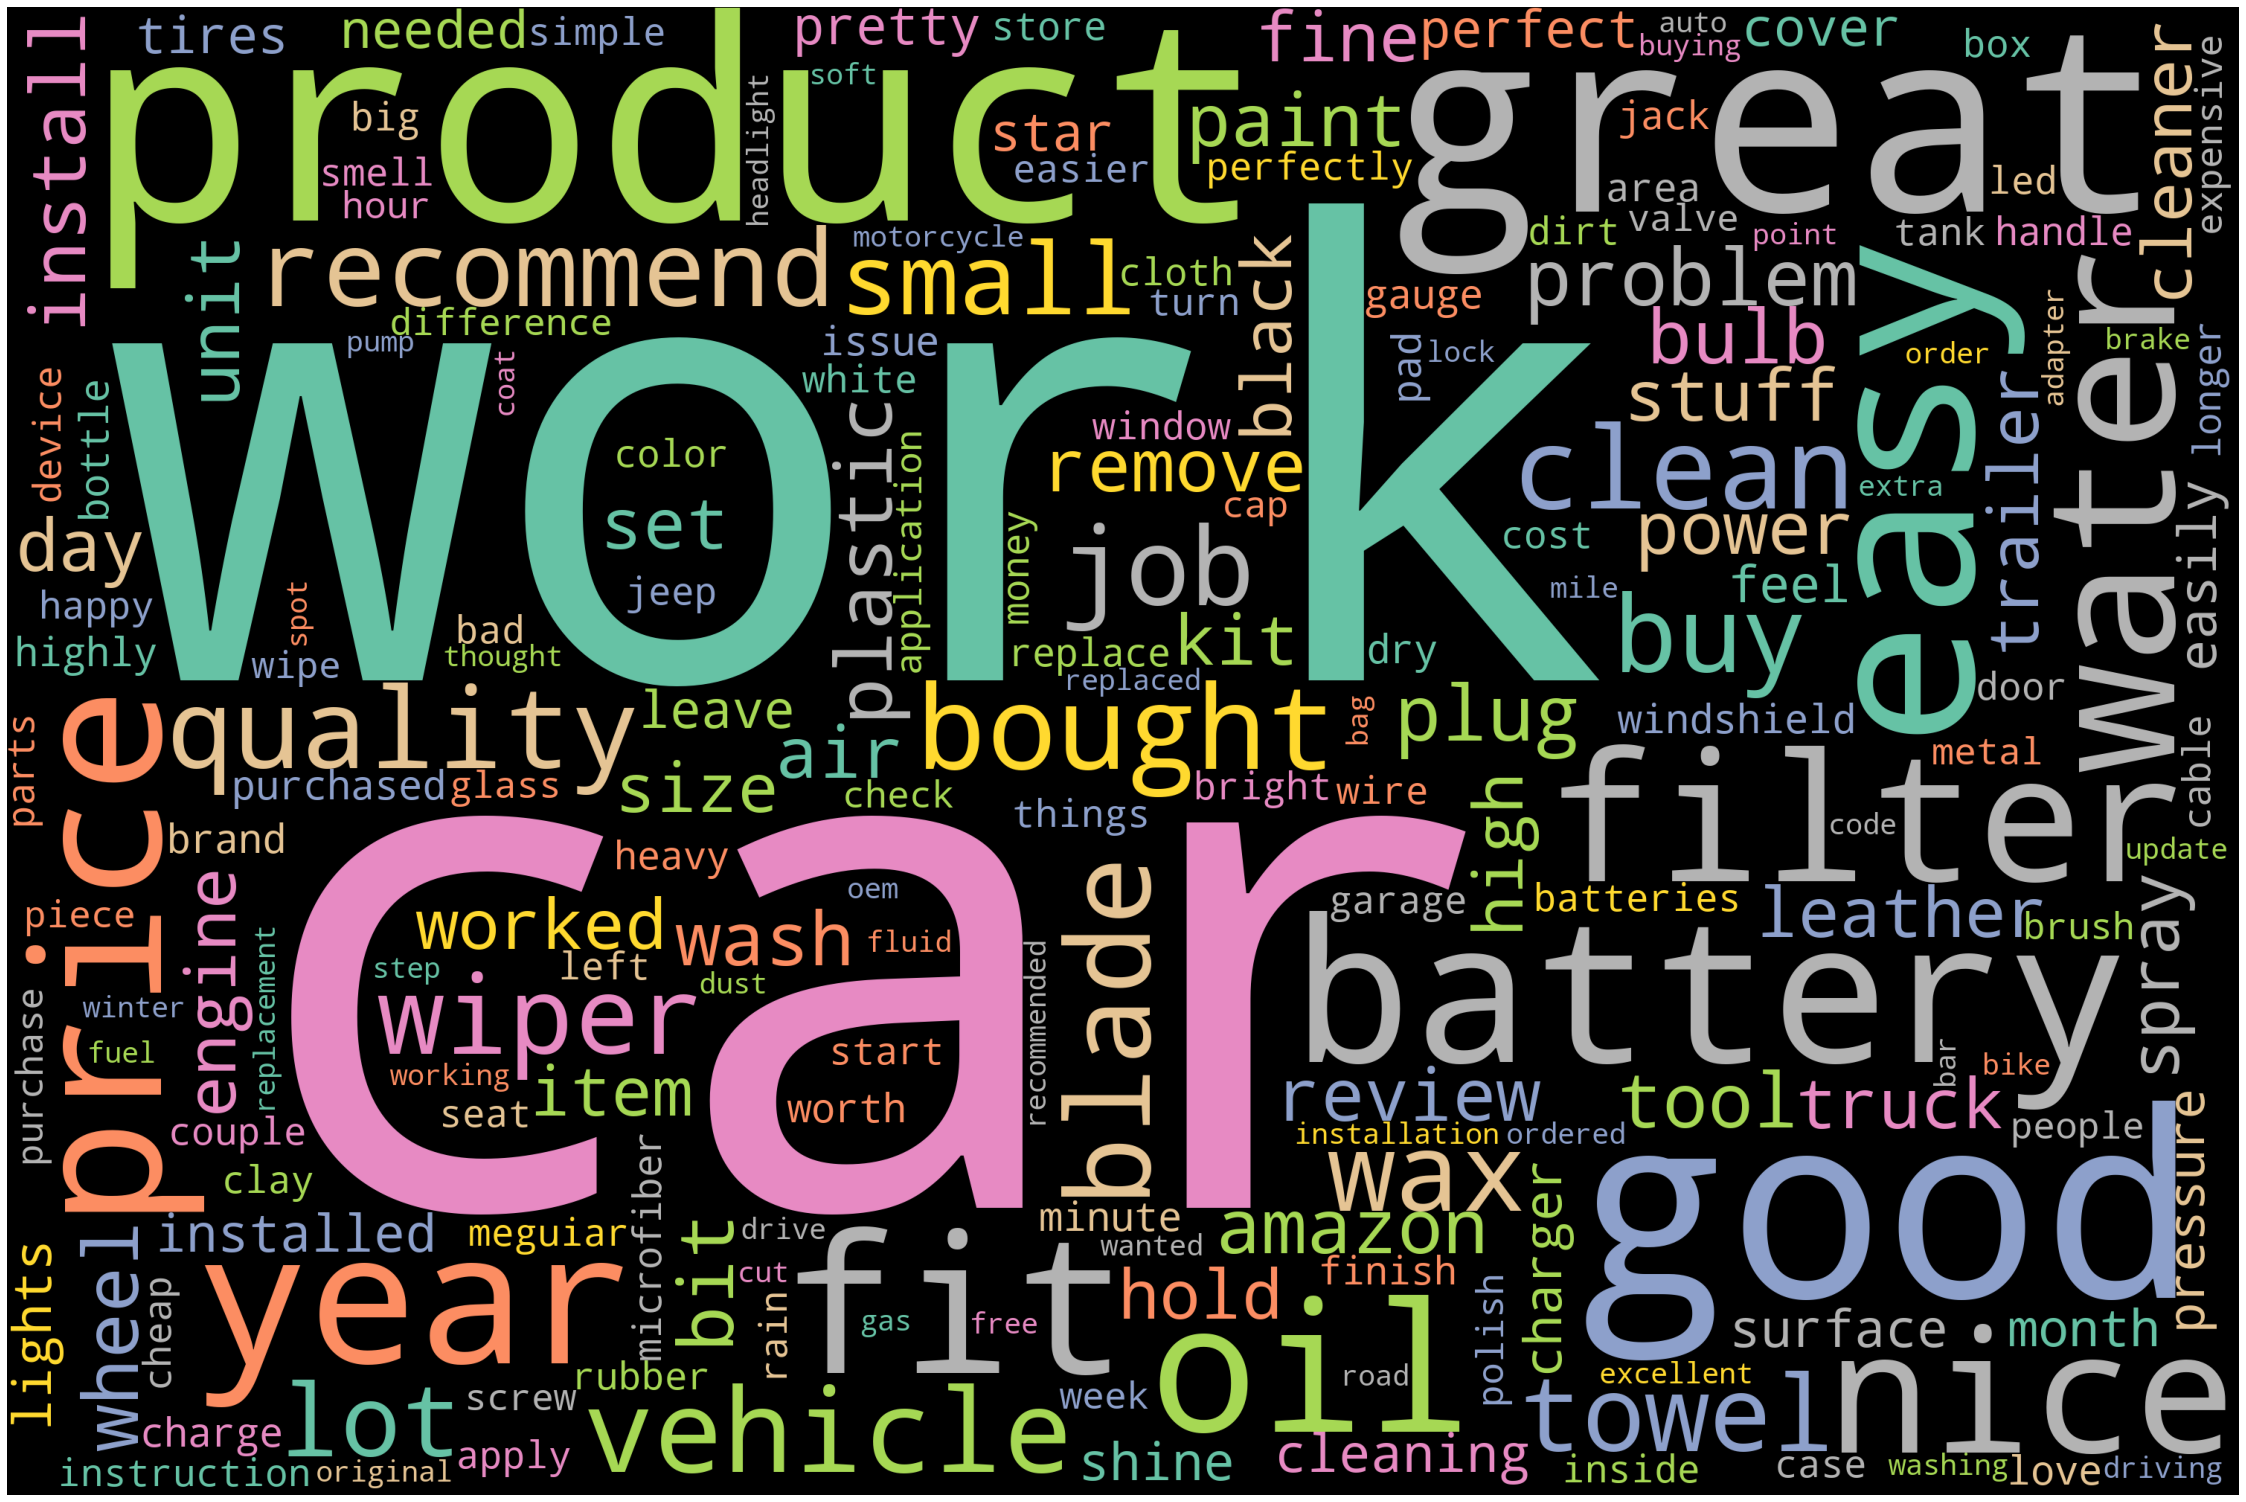

In [61]:
#Generate Wordcloud
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black',
                      colormap='Set2', collocations=False, stopwords=STOPWORDS).generate(texto_final)
# Plot
plot_cloud(wordcloud)

In [62]:
#Generamos la carpeta 'imagenes'.
nueva_carpeta = 'images/'

try:
    os.mkdir(nueva_carpeta)

except OSError:
    print('Ya existe una carpeta llamada %s' % nueva_carpeta)
else:
    print('Se ha creado la carpeta: %s' % nueva_carpeta)

# Save image
wordcloud.to_file("images/wordcloud.png")


Ya existe una carpeta llamada images/
